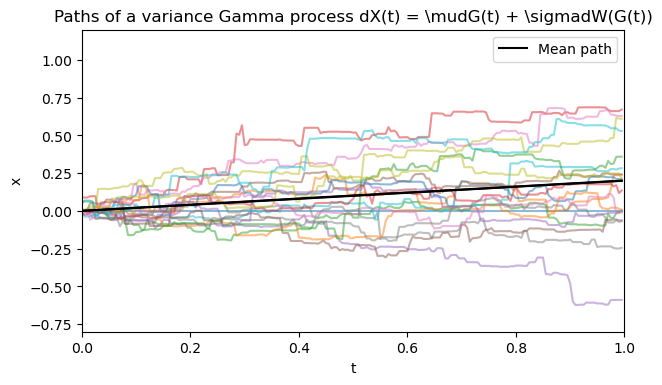

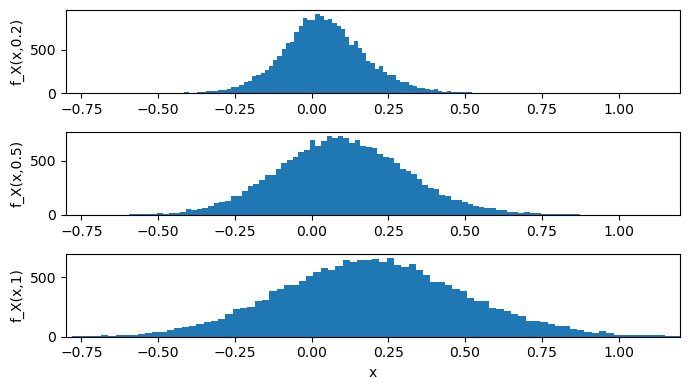

In [4]:
#!/usr/bin/python3
#Variance_Gamma_Process.ipynb
#Parth Parakh
#purpose: Simulate a time-changed arithmetic Brownian motion: the variance Gamma process
#dX(t) = mu*dG(t) + sigma*dW(G(t))

#---------------------------------------------------------------------
#import modules
import numpy as np
import matplotlib.pyplot as plt
#----------------------------------------------------------------------

#Defining the parameters
npaths = 20000;           #number of paths
T = 1;                   #time horizon
nsteps = 200;            #number of time steps
dt = T/nsteps;           #time step
t = np.arange(0,T,dt);   #observation times
mu = 0.2; sigma = 0.3; kappa = 0.05; #model parameters

dG = np.random.gamma(dt/kappa,kappa,(nsteps,npaths));

dX = mu*dG + sigma*np.sqrt(dG)*np.random.normal(0,1,(nsteps,npaths));

#Accumulate the increments
dX[:,0] = 0;
X = np.cumsum(dX,axis=0)

#Compute the expected path
EX = mu*t;

plot1 = plt.figure(1,figsize=(7,4), dpi=100)
for i in range(0,20):
    plt.plot(t,X[:,i],alpha=0.5)
plt.plot(t,EX,'black', label = 'Mean path')
plt.plot(t,np.mean(X,axis=1),'black');
plt.xlim(0,1)
plt.ylim(-0.8,1.2);
plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Paths of a variance Gamma process dX(t) = \mudG(t) + \sigmadW(G(t))')
plt.show()

plot2 = plt.figure(2,figsize=(7,4), dpi=100)
plt.title('Probability density function of a variance Gamma process at different times')
s = 100;
plt.subplot(3,1,1)
plt.hist(X[40,:],s)
plt.xlim(-0.8,1.2)
#plt.ylim(0,3)
plt.ylabel('f_X(x,0.2)')
plt.tight_layout()

plt.subplot(3,1,2)
plt.hist(X[100,:],s)
plt.xlim(-0.8,1.2)
#plt.ylim(0,3)
plt.ylabel('f_X(x,0.5)')
plt.tight_layout()

plt.subplot(3,1,3)
plt.hist(X[199,:],s)
plt.xlim(-0.8,1.2)
#plt.ylim(0,3)
plt.ylabel('f_X(x,1)')
plt.xlabel('x')
plt.tight_layout()